# V4V Dataset development

In [2]:
import os
import numpy as np
import respiration.utils as utils

from typing import Optional


class V4VDataset:
    """
    Class to handle the V4V dataset.
    """

    # Path to the V4V dataset
    data_path: str

    def __init__(self, data_path: Optional[str] = None):
        if data_path is None:
            # Use the default path if not provided
            self.data_path = utils.dir_path('data', 'V4V-Dataset')
        else:
            self.data_path = data_path

    def list_videos(self) -> list[str]:
        """
        List all the videos in the dataset.
        """
        path = os.path.join(self.data_path, 'Phase 1_ Training_Validation sets', 'Videos')

        # list all mkv files in the directory
        videos = [f for f in os.listdir(path) if f.endswith('.mkv')]

        return videos

    def read_ground_truths(self) -> str:
        """
        Read the ground truth files.
        """

        parts = []

        # Read the template file
        path = os.path.join(self.data_path, 'Phase 1_ Training_Validation sets', 'codalab', 'template.txt')

        with open(path, 'r') as file:
            parts.append(file.read().strip())

        # Read the ground truth files
        directory = os.path.join(self.data_path, 'Phase 1_ Training_Validation sets', 'Ground truth', 'Physiology')

        # list all csv files in the directory
        for file in os.listdir(directory):
            if not file.endswith('.txt'):
                continue

            with open(os.path.join(directory, file), 'r') as f:
                parts.append(f.read().strip())

        return '\n'.join(parts)

    def get_metadata(self):
        """
        Parse the data.
        """
        text = self.read_ground_truths()

        # Split the text into parts
        lines = text.split('\n')

        data = []

        for line in lines:
            parts = line.split(', ')
            video, vital = parts[0], parts[1]
            signal = np.array([float(x) for x in parts[2:]])

            subject = video.split('_')[0]
            setting = video.split('_')[1].removesuffix('.mkv')

            data.append({
                'subject': subject,
                'setting': setting,
                'video': video,
                'vital': vital,
                'signal': signal,
            })

        return data

    def get_video_rgb(self, video: str) -> tuple[np.array, utils.VideoParams]:
        """Get the RGB frames of a video."""
        path = os.path.join(self.data_path, 'Phase 1_ Training_Validation sets', 'Videos', video)
        return utils.read_video_rgb(path)

In [3]:
import pandas as pd

dataset = V4VDataset()
df = pd.DataFrame(dataset.get_metadata())
df.head()

,subject,setting,video,vital,signal
0,F002,T5,F002_T5.mkv,HR,"[150.0, 150.0, 150.0, 150.0, 150.0, 150.0, 150..."
1,F002,T5,F002_T5.mkv,RR,"[12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12...."
2,F002,T6,F002_T6.mkv,HR,"[150.0, 150.0, 150.0, 150.0, 150.0, 150.0, 150..."
3,F002,T6,F002_T6.mkv,RR,"[12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12...."
4,F044,T4,F044_T4.mkv,HR,"[150.0, 150.0, 150.0, 150.0, 150.0, 150.0, 150..."


In [4]:
df['video'].unique()

array(['F002_T5.mkv', 'F002_T6.mkv', 'F044_T4.mkv', 'F020_T3.mkv',
       'F014_T10.mkv', 'F011_T2.mkv', 'M005_T2.mkv', 'F014_T7.mkv',
       'M045_T4.mkv', 'M050_T10.mkv', 'M050_T1.mkv', 'F046_T4.mkv',
       'F003_T7.mkv', 'M004_T1.mkv', 'F046_T2.mkv', 'F015_T9.mkv',
       'M008_T4.mkv', 'M045_T7.mkv', 'M004_T9.mkv', 'M035_T2.mkv',
       'M008_T1.mkv', 'F016_T9.mkv', 'F002_T4.mkv', 'M010_T5.mkv',
       'M015_T1.mkv', 'F023_T7.mkv', 'F002_T2.mkv', 'F010_T6.mkv',
       'M006_T5.mkv', 'F004_T5.mkv', 'M009_T5.mkv', 'M005_T9.mkv',
       'F015_T4.mkv', 'M004_T3.mkv', 'M043_T5.mkv', 'M035_T10.mkv',
       'F003_T5.mkv', 'F011_T5.mkv', 'F015_T10.mkv', 'M038_T1.mkv',
       'F003_T3.mkv', 'M006_T10.mkv', 'M015_T4.mkv', 'M010_T10.mkv',
       'F046_T1.mkv', 'M005_T10.mkv', 'F014_T6.mkv', 'F002_T9.mkv',
       'F002_T1.mkv', 'F014_T4.mkv', 'F023_T4.mkv', 'F023_T2.mkv',
       'M008_T3.mkv', 'M050_T2.mkv', 'F016_T1.mkv', 'F015_T5.mkv',
       'F010_T3.mkv', 'M003_T8.mkv', 'M004_T7.mkv', 'M0

15.174658119658117


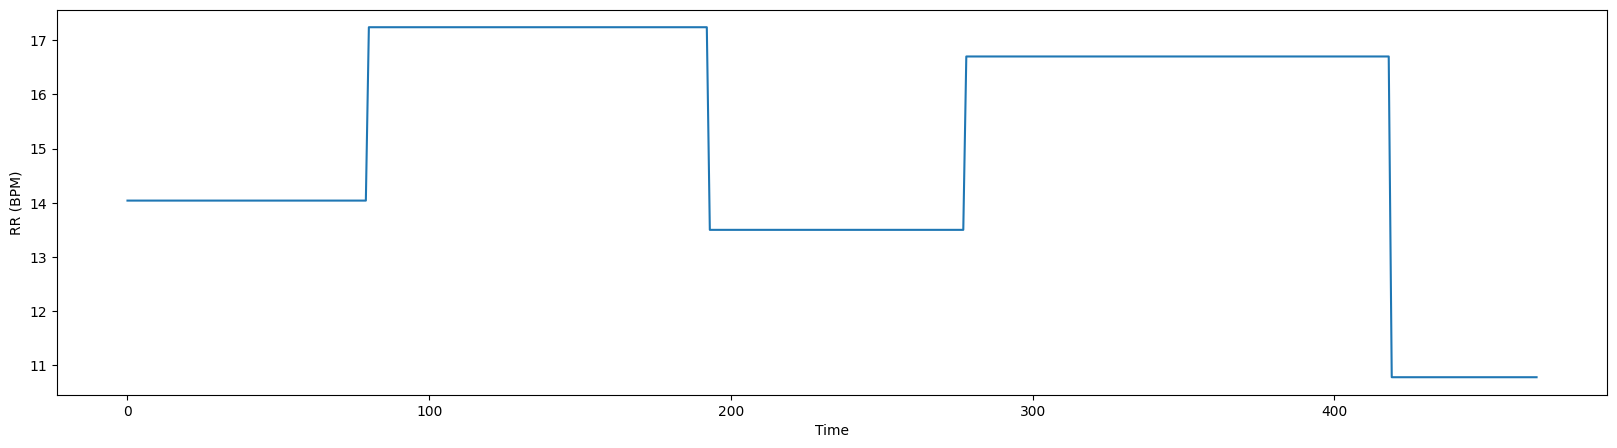

In [5]:
import matplotlib.pyplot as plt

signal = df[(df['video'] == 'F074_T10.mkv') & (df['vital'] == 'RR')]['signal'].values[0]
print(signal.mean())

plt.figure(figsize=(20, 5))

# Set the axis labels
plt.xlabel('Time')
plt.ylabel('RR (BPM)')

plt.plot(signal)
plt.show()